# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

In [0]:
df['ExterQual'] = df['ExterQual'].replace({'Ex': 4, 'Gd': 3, 'TA':2, 'Fa':1, 'Po':0})
df['ExterCond'] = df['ExterCond'].replace({'Ex': 4, 'Gd': 3, 'TA':2, 'Fa':1, 'Po':0})
df['BsmtQual'] = df['BsmtQual'].replace({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0})
df['BsmtCond'] = df['BsmtCond'].replace({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0})
df['BsmtFinType1'] = df['BsmtFinType1'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, np.nan:0})
df['BsmtFinType2'] = df['BsmtFinType2'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec':3, 'LwQ':2, 'Unf':1, np.nan:0})
df['HeatingQC'] = df['HeatingQC'].replace({'Ex': 4, 'Gd': 3, 'TA':2, 'Fa':1, 'Po':0})
df['CentralAir'] = df['ExterQual'].replace({'No':0, 'Yes':1})
df['KitchenQual'] = df['KitchenQual'].replace({'Ex': 4, 'Gd': 3, 'TA':2, 'Fa':1, 'Po':0})
df['FireplaceQu'] = df['FireplaceQu'].replace({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0})
df['GarageQual'] = df['GarageQual'].replace({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0})
df['GarageCond'] = df['GarageCond'].replace({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po':1, np.nan:0})
df['PoolQC'] = df['PoolQC'].replace({'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, np.nan:0})

In [0]:
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.nan,df['YearBuilt'])

In [0]:
df['ln_price'] = np.log(df['SalePrice'])

In [0]:
df_test = df

In [0]:
## features engineered
df_test['GarageCars_Squared'] = df_test['GarageCars']**2
df_test['BsmtFinSF1_Squared'] = df_test['BsmtFinSF1']**2
df_test['BsmtQual_Squared'] = df_test['BsmtQual']**2
df_test['GarageYrBlt_Squared'] = df_test['GarageYrBlt']**2
df_test['age_at_time_sold'] = df_test['YrSold'] - df_test['YearBuilt']
df_test['total_area'] = (
    df_test['GarageArea'] + df_test['GrLivArea'] +df_test['TotalBsmtSF']
                        )
df_test['size_yard'] = df_test['LotArea'] - df_test['GrLivArea']
df_test['yard_int_liv'] = df_test['size_yard'] * df_test['GrLivArea']
df_test['qual_garage_int_bsmt'] = df_test['GarageQual'] * df_test['BsmtQual']
df_test['qual_exter_int_kitchen'] = df_test['ExterQual'] * df_test['KitchenQual']
df_test['total_rooms_bathrooms'] = df_test['TotRmsAbvGrd'] + df_test['FullBath']
df_test['Remodeled'] = (df_test['YearRemodAdd'] != df_test['YearBuilt']) * 1
df_test['RecentRemodel'] = (df_test['YearRemodAdd'] == df_test['YrSold']) * 1

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

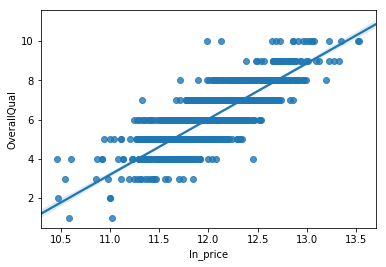

In [69]:
sns.regplot(df['ln_price'], df['OverallQual'])



## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [0]:
target = 'ln_price'
features = ['TotRmsAbvGrd', 'MSSubClass', 'LotArea', 'OverallQual', 'BsmtQual',
           'GarageCars', 'PoolArea', 'age_at_time_sold', 'total_area', 'Remodeled',
           'RecentRemodel', 'GrLivArea']

X = df_test[features]
y = df_test[target]

In [85]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     583.9
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        20:17:12   Log-Likelihood:                 557.22
No. Observations:                1460   AIC:                            -1088.
Df Residuals:                    1447   BIC:                            -1020.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.7974      0.037  

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

In [0]:
## The p-values of the coefficients determine if the coefficients are statistically significant

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [0]:
df_numbers = df_test[['ln_price', 'TotRmsAbvGrd', 'MSSubClass', 'LotArea', 'OverallQual', 'BsmtQual',
           'GarageCars', 'PoolArea', 'age_at_time_sold', 'total_area', 'Remodeled',
           'RecentRemodel', 'GrLivArea']]

df_numbers = df_numbers[(np.abs(stats.zscore(df_numbers)) < 3).all(axis=1)]

In [87]:
df_numbers.shape, df_test[['ln_price', 'TotRmsAbvGrd', 'MSSubClass', 'LotArea', 'OverallQual', 'BsmtQual',
           'GarageCars', 'PoolArea', 'age_at_time_sold', 'total_area', 'Remodeled',
           'RecentRemodel','GrLivArea']].shape

((1229, 13), (1460, 13))

In [88]:
target = 'ln_price'
features = ['TotRmsAbvGrd', 'MSSubClass', 'LotArea', 'OverallQual', 'BsmtQual',
           'GarageCars', 'PoolArea', 'age_at_time_sold', 'total_area', 'Remodeled',
           'RecentRemodel', 'GrLivArea']

X = df_numbers[features]
y = df_numbers[target]

model = sm.OLS(y, sm.add_constant(X))
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     583.9
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        20:17:59   Log-Likelihood:                 557.22
No. Observations:                1460   AIC:                            -1088.
Df Residuals:                    1447   BIC:                            -1020.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.7974      0.037  

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [0]:
## already did it.

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [0]:
##### Your Code Here #####

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [0]:
##### Your Code Here #####

## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
##### Your Code Here #####

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [0]:
##### Your Code Here #####

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

In [0]:
##### Your Code Here #####

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

In [0]:
##### Your Code Here #####

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
##### Your Code Here #####

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.